In [3]:
import pandas as pd
import pickle

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer
import scipy


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

In [4]:
with open('data/pickles/features_29feat_clean.pickle','rb') as read_file:
    df = pickle.load(read_file)

In [5]:
df.head()

,Graduation_Rate_School,Student_Count_Total,Zip_Mean_Income,Fully Accessible,Generally accessible,Student_Count_Asian_perc,Student_Count_Asian_Pacific_Islander_perc,Student_Count_Black_perc,Student_Count_English_Learners_perc,Student_Count_Ethnicity_Not_Available_perc,Student_Count_Hawaiian_Pacific_Islander_perc,Student_Count_Hispanic_perc,Student_Count_Low_Income_perc,Student_Count_Multi_perc,Student_Count_Native_American_perc,Student_Count_Other_Ethnicity_perc,Student_Count_Special_Ed_perc,Student_Count_White_perc,Classroom_Languages_count,Blue,Brown,Green,Orange,Pink,Purple,Red,Dress_Code_dummie,grades_offered_count,charter,gender_f_bn
0,80.9,1739,53353.0,0,1,0.003,0.0,0.033,0.190,0.006,0.0,0.945,0.954,0.002,0.003,0.0,0.162,0.007,2.0,1,0,0,0,1,0,1,0,4,0,0
1,78.6,1706,57770.0,0,1,0.006,0.0,0.031,0.201,0.008,0.0,0.943,0.626,0.004,0.004,0.0,0.162,0.006,2.0,1,0,0,0,1,0,1,0,4,0,0
2,82.8,742,53353.0,0,0,0.000,0.0,0.032,0.228,0.000,0.0,0.962,0.970,0.000,0.001,0.0,0.197,0.004,1.0,1,0,0,1,1,0,0,1,4,1,1
3,85.0,745,57770.0,0,0,0.000,0.0,0.019,0.286,0.001,0.0,0.974,0.930,0.000,0.003,0.0,0.196,0.003,1.0,1,0,0,1,1,0,0,1,4,1,1
4,1.7,199,53353.0,0,0,0.000,0.0,0.774,0.010,0.000,0.0,0.181,0.874,0.000,0.015,0.0,0.291,0.030,0.0,0,0,0,0,0,0,0,0,4,0,1


In [6]:
df['Grad_Rate_Reflected'] = 101 - df['Graduation_Rate_School']

In [7]:
df.head()

,Graduation_Rate_School,Student_Count_Total,Zip_Mean_Income,Fully Accessible,Generally accessible,Student_Count_Asian_perc,Student_Count_Asian_Pacific_Islander_perc,Student_Count_Black_perc,Student_Count_English_Learners_perc,Student_Count_Ethnicity_Not_Available_perc,Student_Count_Hawaiian_Pacific_Islander_perc,Student_Count_Hispanic_perc,Student_Count_Low_Income_perc,Student_Count_Multi_perc,Student_Count_Native_American_perc,Student_Count_Other_Ethnicity_perc,Student_Count_Special_Ed_perc,Student_Count_White_perc,Classroom_Languages_count,Blue,Brown,Green,Orange,Pink,Purple,Red,Dress_Code_dummie,grades_offered_count,charter,gender_f_bn,Grad_Rate_Reflected
0,80.9,1739,53353.0,0,1,0.003,0.0,0.033,0.190,0.006,0.0,0.945,0.954,0.002,0.003,0.0,0.162,0.007,2.0,1,0,0,0,1,0,1,0,4,0,0,20.1
1,78.6,1706,57770.0,0,1,0.006,0.0,0.031,0.201,0.008,0.0,0.943,0.626,0.004,0.004,0.0,0.162,0.006,2.0,1,0,0,0,1,0,1,0,4,0,0,22.4
2,82.8,742,53353.0,0,0,0.000,0.0,0.032,0.228,0.000,0.0,0.962,0.970,0.000,0.001,0.0,0.197,0.004,1.0,1,0,0,1,1,0,0,1,4,1,1,18.2
3,85.0,745,57770.0,0,0,0.000,0.0,0.019,0.286,0.001,0.0,0.974,0.930,0.000,0.003,0.0,0.196,0.003,1.0,1,0,0,1,1,0,0,1,4,1,1,16.0
4,1.7,199,53353.0,0,0,0.000,0.0,0.774,0.010,0.000,0.0,0.181,0.874,0.000,0.015,0.0,0.291,0.030,0.0,0,0,0,0,0,0,0,0,4,0,1,99.3


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


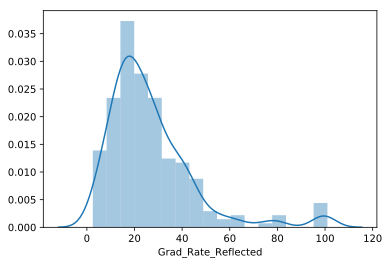

In [8]:
sns.distplot(df['Grad_Rate_Reflected'])

In [9]:
df['log_grad_rate'] = np.log(df['Grad_Rate_Reflected'])

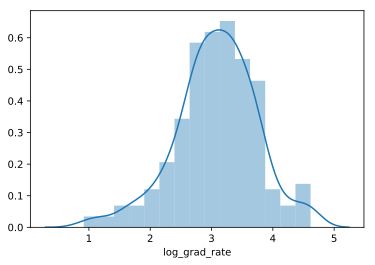

In [10]:
sns.distplot(df['log_grad_rate'])

In [11]:
scipy.stats.skew(df['log_grad_rate'])

-0.3635721198612595

In [12]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    train_score = lr_model.score(X_train, y_train)
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\Train Validation R^2 score was:', train_score)
    print('\nTest Validation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 

In [13]:
list(df)

['Graduation_Rate_School',
 'Student_Count_Total',
 'Zip_Mean_Income',
 'Fully Accessible',
 'Generally accessible',
 'Student_Count_Asian_perc',
 'Student_Count_Asian_Pacific_Islander_perc',
 'Student_Count_Black_perc',
 'Student_Count_English_Learners_perc',
 'Student_Count_Ethnicity_Not_Available_perc',
 'Student_Count_Hawaiian_Pacific_Islander_perc',
 'Student_Count_Hispanic_perc',
 'Student_Count_Low_Income_perc',
 'Student_Count_Multi_perc',
 'Student_Count_Native_American_perc',
 'Student_Count_Other_Ethnicity_perc',
 'Student_Count_Special_Ed_perc',
 'Student_Count_White_perc',
 'Classroom_Languages_count',
 'Blue',
 'Brown',
 'Green',
 'Orange',
 'Pink',
 'Purple',
 'Red',
 'Dress_Code_dummie',
 'grades_offered_count',
 'charter',
 'gender_f_bn',
 'Grad_Rate_Reflected',
 'log_grad_rate']

In [14]:
for_pair = df[['log_grad_rate','Student_Count_Total','Zip_Mean_Income','Fully Accessible',
              'Generally accessible','Student_Count_Asian_perc',
              'Student_Count_Asian_Pacific_Islander_perc',
              'Student_Count_Black_perc','Student_Count_English_Learners_perc']]
              #'Student_Count_Ethnicity_Not_Available_perc','Student_Count_Hawaiian_Pacific_Islander_perc',
              #'Student_Count_Hispanic_perc','Student_Count_Low_Income_perc','Student_Count_Multi_perc',
              #'Student_Count_Native_American_perc','Student_Count_Other_Ethnicity_perc',
              #'Student_Count_Special_Ed_perc','Student_Count_White_perc',
              #'Classroom_Languages_count']
sns.pairplot(for_pair)

## Best R^2 for train and test

In [15]:
X = df[[#'Student_Count_Total',#'Zip_Mean_Income',
         'Fully Accessible','Generally accessible',
         'Graduation_Rate_School',
         'Student_Count_Asian_perc',
         'Student_Count_Asian_Pacific_Islander_perc',
         'Student_Count_Black_perc',
         'Student_Count_English_Learners_perc',
         'Student_Count_Ethnicity_Not_Available_perc',
         'Student_Count_Hawaiian_Pacific_Islander_perc',
         'Student_Count_Hispanic_perc',
         'Student_Count_Low_Income_perc',
         'Student_Count_Multi_perc',
         'Student_Count_Native_American_perc',
         #'Student_Count_Other_Ethnicity_perc',
         'Student_Count_Special_Ed_perc',
         'Student_Count_White_perc',
         'Classroom_Languages_count',
         'Blue',
         #'Brown',
         'Green',
         'Orange',
         'Pink',
         'Purple',
         'Red',
         'Dress_Code_dummie',
         'grades_offered_count',
         'charter',
         'gender_f_bn'
           ]]
y = df['log_grad_rate']
split_and_validate(X, y)

\Train Validation R^2 score was: 0.8842614431133102

Test Validation R^2 score was: 0.8500059826309203
Feature coefficient results: 

Fully Accessible : 0.10
Generally accessible : 0.17
Graduation_Rate_School : -0.03
Student_Count_Asian_perc : 12.97
Student_Count_Asian_Pacific_Islander_perc : -104.68
Student_Count_Black_perc : 14.27
Student_Count_English_Learners_perc : 1.91
Student_Count_Ethnicity_Not_Available_perc : 12.14
Student_Count_Hawaiian_Pacific_Islander_perc : 14.85
Student_Count_Hispanic_perc : 13.77
Student_Count_Low_Income_perc : 0.15
Student_Count_Multi_perc : 9.68
Student_Count_Native_American_perc : 12.34
Student_Count_Special_Ed_perc : -0.68
Student_Count_White_perc : 14.65
Classroom_Languages_count : -0.03
Blue : 0.10
Green : -0.02
Orange : 0.16
Pink : -0.10
Purple : -0.23
Red : 0.06
Dress_Code_dummie : 0.07
grades_offered_count : -0.01
charter : 0.02
gender_f_bn : -0.07


In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
lm = LinearRegression()

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, 
                                                  random_state=42)
    
kf = KFold(n_splits = 5, shuffle=True, random_state = 42)
print((cross_val_score(lm, X, y, cv=kf, scoring='r2')))

[0.83200156 0.84219236 0.82665703 0.7962541  0.84219387]


## Manual K-Folds

In [26]:
X = df[[#'Student_Count_Total','Zip_Mean_Income',
         'Fully Accessible','Generally accessible',
         'Graduation_Rate_School',
         'Student_Count_Asian_perc',
         'Student_Count_Asian_Pacific_Islander_perc',
         'Student_Count_Black_perc',
         'Student_Count_English_Learners_perc',
         'Student_Count_Ethnicity_Not_Available_perc',
         'Student_Count_Hawaiian_Pacific_Islander_perc',
         'Student_Count_Hispanic_perc',
         'Student_Count_Low_Income_perc',
         'Student_Count_Multi_perc',
         'Student_Count_Native_American_perc',
         #'Student_Count_Other_Ethnicity_perc',
         'Student_Count_Special_Ed_perc',
         'Student_Count_White_perc',
         'Classroom_Languages_count',
         'Blue',
         #'Brown',
         'Green',
         'Orange',
         'Pink',
         'Purple',
         'Red',
         'Dress_Code_dummie',
         'grades_offered_count',
         'charter',
         'gender_f_bn'
           ]]
y = df['log_grad_rate']

kf = KFold(n_splits = 5, shuffle=True, random_state = 42)

train_r2 = []
val_r2   = []

for train_ind, val_ind in kf.split(X,y):
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
    
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    train_r2.append(lm.score(X_train, y_train))
    val_r2.append(lm.score(X_val, y_val))

print(train_r2)
print(val_r2) 

[0.8844650468609707, 0.890739952597585, 0.8928354825710378, 0.8862901215357798, 0.8897029066758928]
[0.8493169775405989, 0.8224663674771625, 0.7995139440524652, 0.8502239054513859, 0.8229486374917442]


## With features culled with p values from statsmodel.

In [ ]:
X = df[[#'Student_Count_Total',
        #'Zip_Mean_Income',
        'Fully Accessible',
        'Generally accessible',
         #'Graduation_Rate_School',
         'Student_Count_Asian_perc',
         #'Student_Count_Asian_Pacific_Islander_perc',
         'Student_Count_Black_perc',
         'Student_Count_English_Learners_perc',
         'Student_Count_Ethnicity_Not_Available_perc',
         #'Student_Count_Hawaiian_Pacific_Islander_perc',
         'Student_Count_Hispanic_perc',
         'Student_Count_Low_Income_perc',
         #'Student_Count_Multi_perc',
         'Student_Count_Native_American_perc',
         #'Student_Count_Other_Ethnicity_perc',
         'Student_Count_Special_Ed_perc',
         'Student_Count_White_perc',
         #'Classroom_Languages_count',
         'Blue',
         'Brown',
         'Green',
         #'Orange',
         'Pink',
         #'Purple',
         #'Red',
         'Dress_Code_dummie',
         'grades_offered_count',
         'charter',
         'gender_f_bn'
           ]]

y = df['log_grad_rate']

split_and_validate(X, y) 

   ## K-Folds on high R-Squared